# cdflib

In [4]:
pip install cdflib
as

SyntaxError: invalid syntax (1072939289.py, line 1)

In [5]:
import cdflib 

In [6]:
from datetime import datetime as dt

In [7]:
import numpy as np

In [12]:
# Change this to your local filepath 

wna_filepath = '/Users/rachelblack/Documents/VScode/ExampleFile/rbsp-a_WFR-spectral-matrix-diagonal_emfisis-L2_20121028_v1.2.8.cdf'
#wna_filepath = '/Users/Owner/Documents/Exeter/ExampleFile/rbsp-a_WFR-spectral-matrix-diagonal_emfisis-L2_20121028_v1.2.8.cdf'

In [13]:
wna_file = cdflib.CDF(wna_filepath)

In [14]:
wna_file.cdf_info()

{'CDF': PosixPath('/Users/rachelblack/Documents/VScode/ExampleFile/rbsp-a_WFR-spectral-matrix-diagonal_emfisis-L2_20121028_v1.2.8.cdf'),
 'Version': '3.5.0',
 'Encoding': 1,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['Epoch',
  'BuBu',
  'BvBv',
  'BwBw',
  'EuEu',
  'EvEv',
  'EwEw',
  'WFR_bins',
  'WFR_bandwidth',
  'WFR_frequencies',
  'TotalPowerB',
  'TotalPowerE',
  'LWEzGainW',
  'LWExEyGainUV',
  'SCMGain',
  'SPTT',
  'MET',
  'APID'],
 'Attributes': [{'Project': 'Global'},
  {'Source_name': 'Global'},
  {'Discipline': 'Global'},
  {'Data_type': 'Global'},
  {'Descriptor': 'Global'},
  {'File_naming_convention': 'Global'},
  {'Data_version': 'Global'},
  {'PI_name': 'Global'},
  {'PI_affiliation': 'Global'},
  {'TEXT': 'Global'},
  {'Instrument_type': 'Global'},
  {'Mission_group': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Time_resolution': 'Global'},
  {'Rules_of_use': 'Global

In [15]:
wna_file.varattsget('EuEu')

{'CATDESC': 'EuEu',
 'DEPEND_0': 'Epoch',
 'DEPEND_1': 'WFR_frequencies',
 'DISPLAY_TYPE': 'spectrogram',
 'FIELDNAM': 'EuEu',
 'FILLVAL': -1e+31,
 'FORMAT': 'E12.2',
 'LABLAXIS': 'PSD',
 'UNITS': 'V^2/m^2/Hz',
 'VALIDMIN': 1e-30,
 'VALIDMAX': 1e+31,
 'VAR_TYPE': 'data',
 'SCALETYP': 'log'}

In [16]:
wna_file.varget('Epoch')

array([404654470352011128, 404654476352050169, 404654482352009221, ...,
       404740852412638350, 404740858412637576, 404740864412636801])

In [17]:
cdflib.cdfepoch.breakdown(wna_file.varget('Epoch')[0])

[2012, 10, 28, 0, 0, 3, 168, 11, 128]

In [18]:
import time_conversions

time_conversions.cdflib_time_conversion(wna_file.varget('Epoch')[0])

datetime.datetime(2012, 10, 28, 0, 0, 3, 168011)

In [19]:
wna_file.close()

# pycdf

In [20]:
from spacepy import pycdf

In [21]:
wna_file2 = pycdf.CDF(wna_filepath)

In [22]:
wna_file2['Epoch'][0]

datetime.datetime(2012, 10, 28, 0, 0, 3, 168011)

In [23]:
# showing the weird shape of the array in pycdf situation
np.shape(wna_file2['TotalPowerB'])

(0, 65)

## Plot

In [24]:
# Define magnetic field components

Bu2 = wna_file2['BuBu']
Bv2 = wna_file2['BvBv']
Bw2 = wna_file2['BwBw']

# Define empty list for total mag field array 

Btotal = np.zeros(wna_file2['BuBu'].shape)

In [25]:
# Create total mag B array

for i in range(0,np.shape(Btotal)[0]):
    Btotal[i,:] = Bu2[i,:] + Bv2[i,:] + Bw2[i,:]

In [26]:
# Define electric field components

Eu2 = wna_file2['EuEu']
Ev2 = wna_file2['EvEv']
Ew2 = wna_file2['EwEw']

# Define empty list for total mag field array 

Etotal = np.zeros(wna_file2['EuEu'].shape)

In [27]:
# Create total E array

for i in range(0,np.shape(Btotal)[0]):
    Etotal[i,:] = Eu2[i,:] + Ev2[i,:] + Ew2[i,:]

Exception ignored in: <function CDF.__del__ at 0x7f9640504700>
Traceback (most recent call last):
  File "/Users/rachelblack/opt/anaconda3/envs/wavey/lib/python3.10/site-packages/cdflib/cdfread.py", line 181, in __del__
AttributeError: 'CDF' object has no attribute 'temp_file'


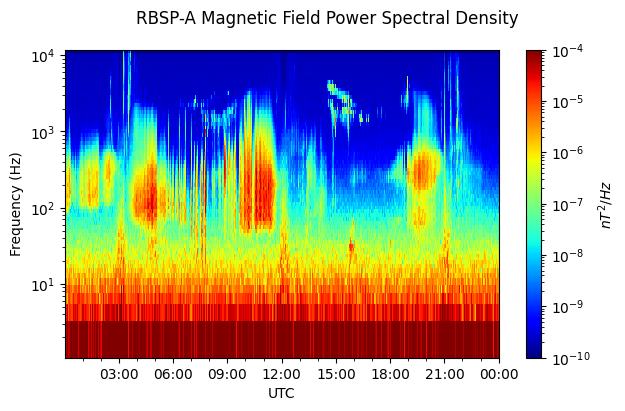

In [28]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.LogNorm(vmin=10**(-10), vmax=10**(-4))
cont = plt.pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Btotal), 
    norm=colorbar_norm, 
    cmap="jet")
plt.xlabel('UTC')
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label=r'$nT^2/Hz$'
    )
plt.suptitle(f'RBSP-A Magnetic Field Power Spectral Density')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((7, 4))

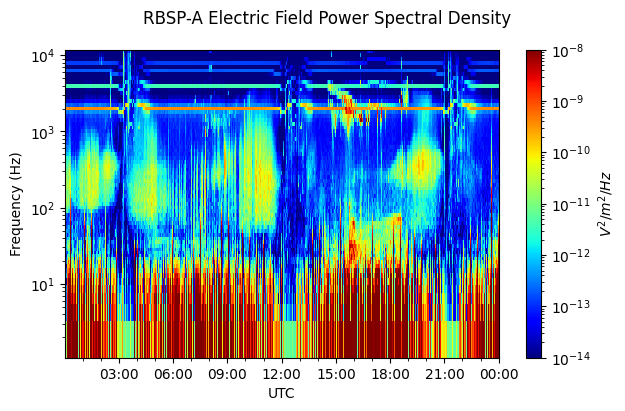

In [29]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.LogNorm(vmin=10**(-14), vmax=10**(-8))
cont = plt.pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Etotal), 
    norm=colorbar_norm, 
    cmap="jet")
plt.xlabel('UTC')
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label=r'$V^2/m^2/Hz$'
    )
plt.suptitle(f'RBSP-A Electric Field Power Spectral Density')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((7, 4))

# Creating panels 4-7 (Planarity, Ellipticity, Wave normal angle, (S0=Poynting vector angle))

In [31]:
# Creating panels 4 - 7
filepath_47 = '/Users/rachelblack/Documents/VScode/ExampleFile/rbsp-a_wna-survey_emfisis-l4_20121028_v1.7.1.cdf'

cdf_47 = pycdf.CDF(filepath_47)


In [32]:
file47 = pycdf.CDF(filepath_47)
CDF47 = cdflib.CDF(filepath_47)

In [33]:
data47 = file47.copy()

In [34]:
data47.keys()

dict_keys(['Epoch', 'WFR_frequencies', 'b3', 'bsum', 'bsumperp', 'cohb1_2', 'cohb1_3', 'cohb2_3', 'e3', 'eigen', 'ellsvd', 'esum', 'esumperp', 'phpoy1_2_3', 'phsvd', 'plansvd', 'plansvde', 'polsvd', 'poy1_2_3', 'thpoy1_2_3', 'thsvd', 'R', 'MagLat', 'MLT', 'L', 'Tuvw2fac', 'Buvw'])

In [35]:
#print(CDF47.varattsget('ellsvd'))     # Ellipticity of the magnetic field polarisation -5
print(CDF47.varattsget('phpoy1_2_3')) # Poynting vector azimuthal angle - 7
print(CDF47.varattsget('thpoy1_2_3')) # Poynting vector polar angle - 7
#print(CDF47.varattsget('phsvd'))      # Azimuthal angle of wave vector - 6
#print(CDF47.varattsget('thsvd'))      # Polar angle of wave vector - 6 
#print(CDF47.varattsget('plansvd'))    # Planarity -4 
# Note: Only the polar angle is required to evaluate the resonance condition
# Note: SVD stands for singular value approximation

{'CATDESC': 'AZIMUTHAL ANGLE OF THE POYNTING VECTOR', 'DEPEND_0': 'Epoch', 'DEPEND_1': 'WFR_frequencies', 'DISPLAY_TYPE': 'spectrogram', 'FIELDNAM': 'phpoy1_2_3', 'FILLVAL': -1e+31, 'FORMAT': 'E12.2', 'LABLAXIS': 'Phi!dS!n', 'UNITS': 'deg', 'VALIDMIN': -1e+30, 'VALIDMAX': 1e+31, 'VAR_TYPE': 'data'}
{'CATDESC': 'POLAR ANGLE OF THE POYNTING VECTOR', 'DEPEND_0': 'Epoch', 'DEPEND_1': 'WFR_frequencies', 'DISPLAY_TYPE': 'spectrogram', 'FIELDNAM': 'thpoy1_2_3', 'FILLVAL': -1e+31, 'FORMAT': 'E12.2', 'LABLAXIS': 'Theta!dS!n', 'UNITS': 'deg', 'VALIDMIN': -1e+30, 'VALIDMAX': 1e+31, 'VAR_TYPE': 'data'}


In [41]:
epoch = file47['Epoch']
print(len(epoch))

planar = file47['plansvd']
print(len(planar))

wna_azi = file47['phsvd']
print(len(wna_azi))

wna_polar = file47['thsvd']

s_azi= file47['phpoy1_2_3']

s_polar = file47['thpoy1_2_3']

14400
14400
14400


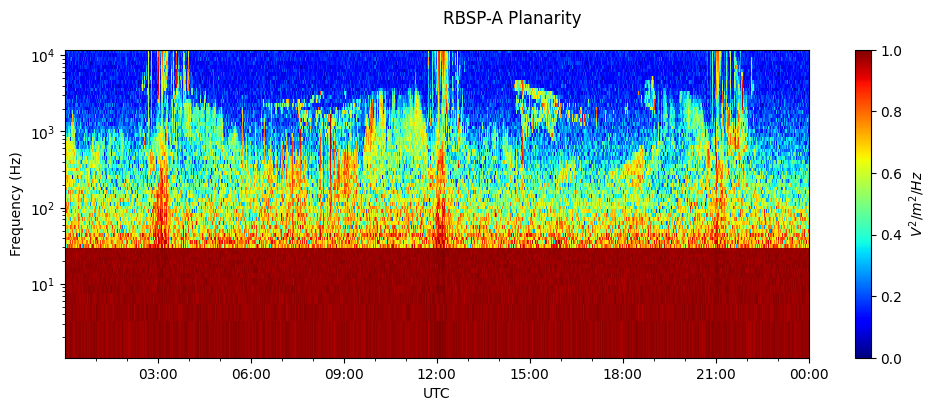

In [42]:
# Panel 4 - planarity 

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.Normalize(vmin=0., vmax=1.)
cont = plt.pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(planar), 
    norm=colorbar_norm, 
    cmap="jet")
plt.xlabel('UTC')
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label=r'$V^2/m^2/Hz$'
    )
plt.suptitle(f'RBSP-A Planarity ')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 4))

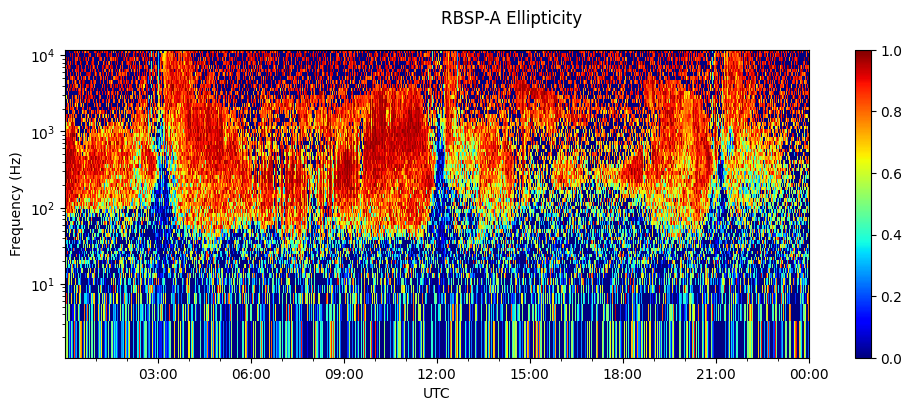

In [43]:
# Panel 5 - Ellipticity

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.Normalize(vmin=0., vmax=1.)
cont = plt.pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(file47['ellsvd']), 
    norm=colorbar_norm, 
    cmap="jet")
plt.xlabel('UTC')
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont
    )
plt.suptitle(f'RBSP-A Ellipticity ')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 4))

In [44]:
print(np.max(wna_polar))

89.999954


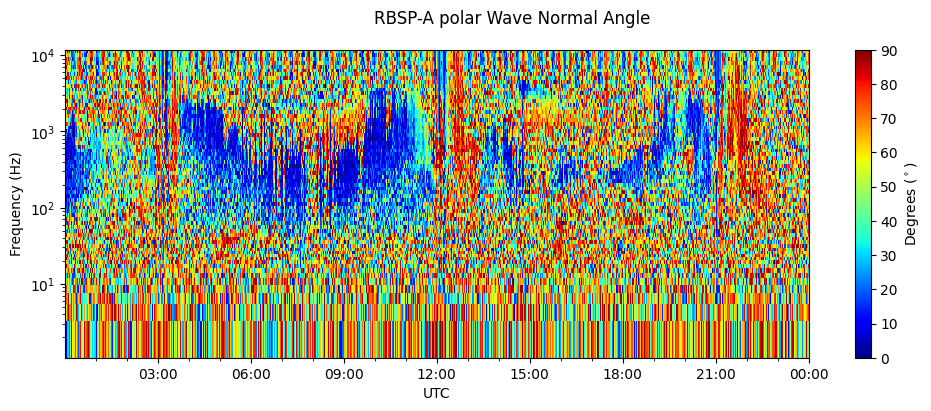

In [45]:
# Panel 6 - Polar Wave Normal Angle - i.e angle between background mag field and wave vector

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.Normalize(vmin=0., vmax=90.)
cont = plt.pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(wna_polar), 
    norm=colorbar_norm, 
    cmap="jet")
plt.xlabel('UTC')
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label='Degrees ($^\circ$)'
    )
plt.suptitle(f'RBSP-A polar Wave Normal Angle ')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 4))

In [46]:
print(np.max(s_polar))

179.977


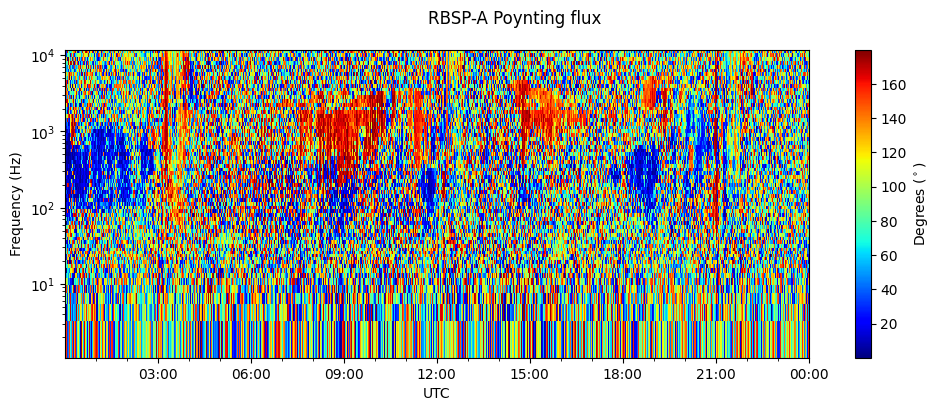

In [47]:
# Panel 7 - Poynting flux

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.Normalize()
cont = plt.pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(s_polar), 
    norm=colorbar_norm, 
    cmap="jet")
plt.xlabel('UTC')
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label='Degrees ($^\circ$)'
    )
plt.suptitle(f'RBSP-A Poynting flux')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 4))

# h5py

In [48]:
import h5py

In [51]:
lanl_filepath = '/Users/rachelblack/Documents/VScode/ExampleFile/rbspa_def_MagEphem_TS04D_20121028_v3.0.0.h5'

In [52]:
lanl = h5py.File(lanl_filepath)

In [53]:
lanl['IsoTime'][...][0].decode("UTF-8")

'2012-10-28T00:00:00Z'

In [54]:
lanl['Lstar']

<HDF5 dataset "Lstar": shape (289, 18), type "<f8">

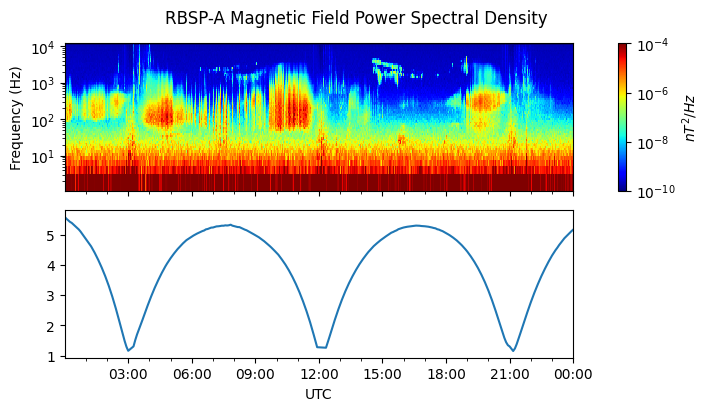

In [55]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import numpy as np

colorbar_norm = mcolors.LogNorm(vmin=10**(-10), vmax=10**(-4))
fig, axs = plt.subplots(2, 1, constrained_layout=True, sharex=True)
cont = axs[0].pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Btotal), 
    norm=colorbar_norm, 
    cmap="jet")
axs[0].set_yscale('log')
axs[0].set_ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label=r'$nT^2/Hz$', 
    ax=axs[0]
    )

lstar = np.array(lanl['Lstar'][:, 0])
axs[1].plot(np.array([time_conversions.h5_time_conversion(x) for x in lanl['IsoTime']])[lstar >= 0], 
    lstar[lstar >= 0])
axs[1].set_xlabel('UTC')
plt.suptitle(f'RBSP-A Magnetic Field Power Spectral Density')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((7, 4))



# Calculating the electron gyrofrequency

In [143]:
magnet_filepath = '/Users/rachelblack/Documents/VScode/ExampleFile/rbsp-a_magnetometer_1sec-geo_emfisis-L3_20121028_v1.3.4.cdf'


In [144]:
magnet_file = pycdf.CDF(magnet_filepath)
magnet_CDF = cdflib.CDF(magnet_filepath)

In [145]:
magdat = magnet_file.copy()

In [146]:
magdat.keys()

dict_keys(['Epoch', 'Epoch_centered', 'Mag', 'Magnitude', 'delta', 'lambda', 'range_flag', 'partition', 'MET', 'calState', 'magInvalid', 'magFill', 'rms', 'coordinates', 'Mag_LABL_1', 'coordinates_LABL_1'])

In [147]:
file1 = wna_file2.copy()
file1CDF = cdflib.CDF(wna_filepath)

In [148]:
file1.keys()

dict_keys(['Epoch', 'BuBu', 'BvBv', 'BwBw', 'EuEu', 'EvEv', 'EwEw', 'WFR_bins', 'WFR_bandwidth', 'WFR_frequencies', 'TotalPowerB', 'TotalPowerE', 'LWEzGainW', 'LWExEyGainUV', 'SCMGain', 'SPTT', 'MET', 'APID'])

In [149]:
print(magnet_CDF.varattsget('magInvalid'))
print(magnet_CDF.varattsget('magFill'))
print(magnet_CDF.varattsget('calState'))

{'CATDESC': 'Indicator of invalid data.  0 - Valid data, 1 - Invalid data.  USE INVALID DATA WITH EXTREME CAUTION!', 'DEPEND_0': 'Epoch', 'FIELDNAM': 'magInvalid_flag', 'FILLVAL': -128, 'FORMAT': 'I3', 'VALIDMIN': 0, 'VALIDMAX': 1, 'VAR_TYPE': 'support_data', 'SCALETYP': 'linear'}
{'CATDESC': 'Indicator of fill data.  0 - Valid data, 1 - Fill data used.  Data is occationaly filled where a data gap exists.  DO NOT USE FILL DATA FOR SCIENTIFIC PURPOSES!', 'DEPEND_0': 'Epoch', 'FIELDNAM': 'magFill_flag', 'FILLVAL': -128, 'FORMAT': 'I3', 'VALIDMIN': 0, 'VALIDMAX': 1, 'VAR_TYPE': 'support_data', 'SCALETYP': 'linear'}
{'CATDESC': 'Calibrator signal active status, 0 - Calibration off, 1 - Calibration on. Data is not scientifically valid when the calibration is active.', 'DEPEND_0': 'Epoch', 'FIELDNAM': 'calState_flag', 'FILLVAL': -128, 'FORMAT': 'I3', 'VALIDMIN': 0, 'VALIDMAX': 1, 'VAR_TYPE': 'support_data', 'SCALETYP': 'linear'}


In [150]:
print(magnet_CDF.varattsget('epoch'))

{'CATDESC': 'Default time', 'FIELDNAM': 'Epoch', 'FILLVAL': -9223372036854775808, 'LABLAXIS': 'Time', 'UNITS': 'ns', 'VALIDMIN': -315575942816000000, 'VALIDMAX': 946728069183000000, 'VAR_TYPE': 'support_data', 'SCALETYP': 'linear', 'MONOTON': 'INCREASE', 'TIME_BASE': 'J2000', 'BIN_LOCATION': 0.0}


In [151]:
# As you can see above, any data points that is listed under 1 in any of the flags should be excluded 
# it is either calliration mode, invalid data, or fill data)

magfill = magnet_file['magFill']
magInval = magnet_file['magInvalid']
magCal = magnet_file['calState']

In [152]:
whereFill = []
for i in range(len(magfill)):
    if magfill[i] == 1:
        whereFill.append(i)
        
whereInval = []
for i in range(len(magInval)):
    if magInval[i] == 1:
        whereInval. append(i)

whereCal = []
for i in range(len(magCal)):
    if magCal[i] == 1:
        whereCal. append(i)

In [153]:
print('Points of magFill data:',whereFill)
print('Points of Invalid data:',whereInval)
print('Points of Callibration data:',whereCal)

Points of magFill data: []
Points of Invalid data: [9456, 9457, 9458, 9459, 13008, 13009, 13010, 13011, 41952, 41953, 41954, 41955, 45600, 45601, 45602, 45603, 74124, 74125, 74126, 74127, 77856, 77857, 77858, 77859]
Points of Callibration data: []


In [154]:
Bmag = magnet_file['Magnitude']


In [155]:
epoch = magnet_file['Epoch']

In [156]:
# Setting up calculation to get gyrofrequency from mag field measurements (w=qB/m)

q = 1.6*10**(-19)
m = 9.1*10**(-31)

# Defining the desired gyrofrequency fractions: 1, 0.5, 0.1

gyroF = np.zeros(Bmag.shape)
half_gyroF = np.zeros(Bmag.shape)
tenth_gyroF = np.zeros(Bmag.shape)
epochT =[]

In [157]:
# doing calculation for entire array + applying flags

for i in range(0,len(gyroF)):
    gyroF[i] = q*Bmag[i]*(10**(-9))/(2*3.14*m)
    half_gyroF[i] = 0.5*gyroF[i]
    tenth_gyroF[i] = 0.1*gyroF[i]
    epochT.append(dt.strftime(epoch[i],'%Y-%m-%d %H-%M-%S'))

gyroF = gyroF.tolist()
half_gyroF = half_gyroF.tolist()
tenth_gyroF = tenth_gyroF.tolist()

for ele in sorted(whereInval, reverse = True):
    
    del gyroF[ele]
    del half_gyroF[ele]
    del tenth_gyroF[ele]
    del epochT[ele]


In [158]:
for i in range(len(epochT)):
    epochT[i] = dt.strptime(epochT[i],'%Y-%m-%d %H-%M-%S')

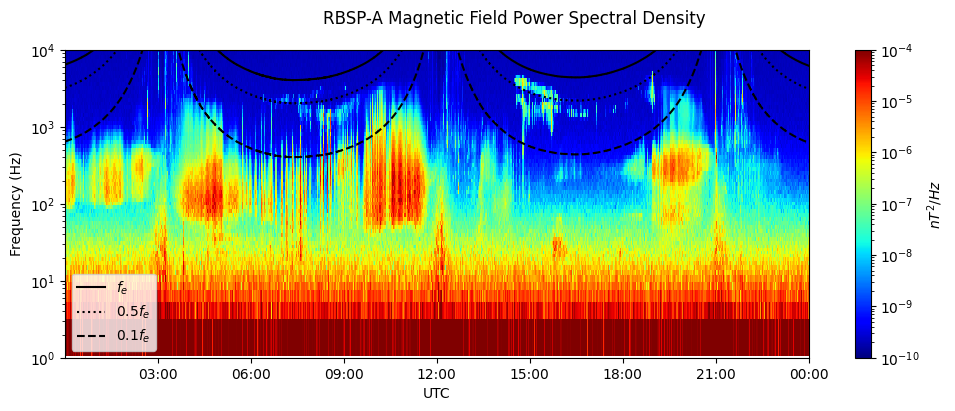

In [159]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates


colorbar_norm = mcolors.LogNorm(vmin=10**(-10), vmax=10**(-4))
cont = plt.pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Btotal), 
    norm=colorbar_norm, 
    cmap="jet")
plt.plot(epochT,gyroF, color='black', label = r'$f_e$')
plt.plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
plt.plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
plt.legend()
plt.xlabel('UTC')
plt.ylim(10**0,10.**4)
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label=r'$nT^2/Hz$'
    )
plt.suptitle(f'RBSP-A Magnetic Field Power Spectral Density')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
#hours = mdates.HourLocator(interval=1)
#plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 4))
plt.show()

Background reduction

In [59]:
# This is data from the VA probe A on date 28/10/2012

noise_file = '/Users/rachelblack/Documents/VScode/ExampleFile/background_data/threshold_RBSP-A_start_2012-10-01_end_2015-02-15'


In [137]:
# Setting up lists of backnoise

freq=[]
noise=[]

f=open(noise_file,"r")
lines=f.readlines()[1:]

for x in lines:
    xs = x.strip()
    xs= xs.split(' ')
    freq.append(float(xs[0]))
    noise.append(float(xs[1]))

f.close()

In [139]:
# Remove background to create summative plot

# 1 Btotal
Btotal_reduced = np.zeros(np.shape(Btotal))
for i in range(len(noise)):
    for j in range(14400):
        Btotal_reduced[j,i] = Btotal[j,i] - noise[i]

# 2 Etotal



Creating the big plot

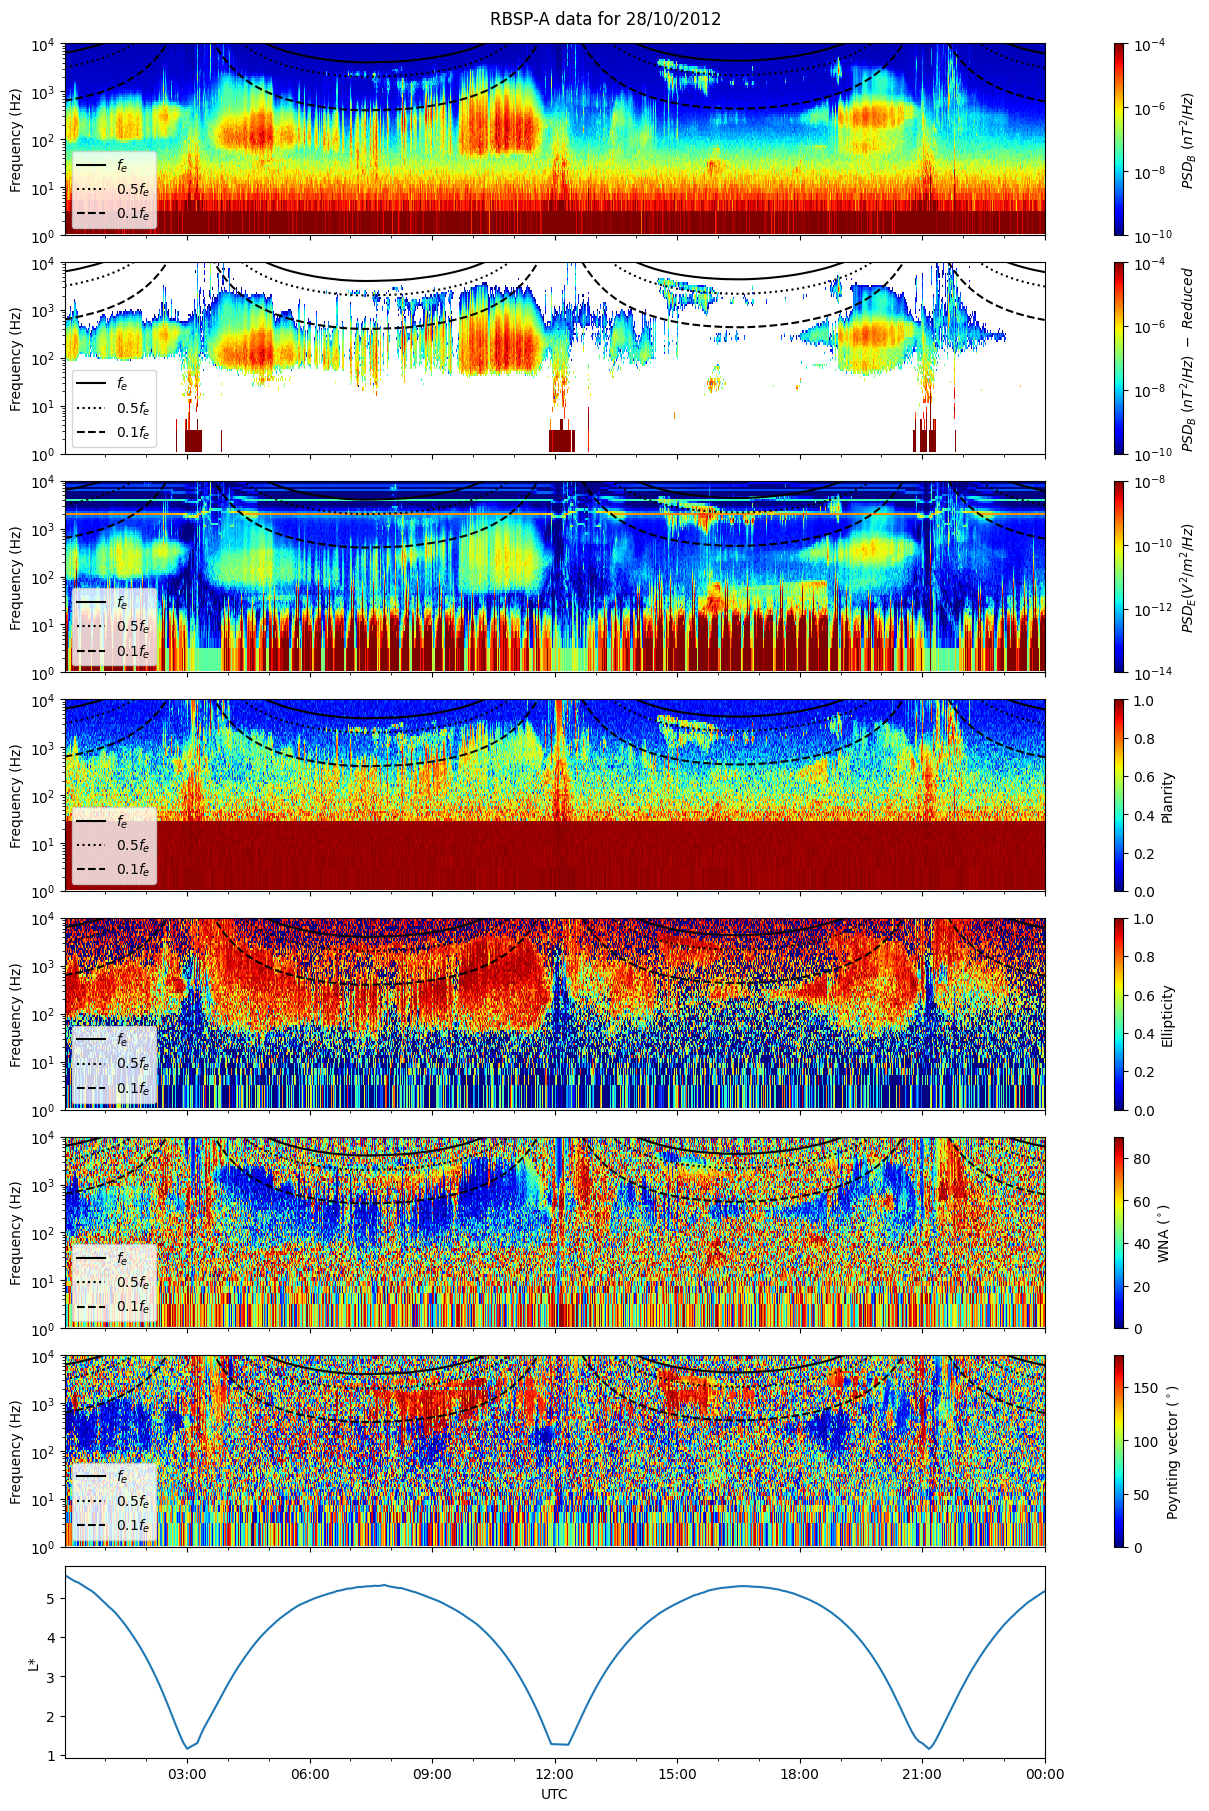

In [174]:
colorbar_log = mcolors.LogNorm(vmin=10**(-10), vmax=10**(-4))      # B density
colorbar_logE = mcolors.LogNorm(vmin=10**(-14), vmax=10**(-8))     # E density
colorbar_plan = mcolors.Normalize(vmin=0., vmax=1.)                # Planarity/ellipticity
colorbar_polar = mcolors.Normalize(vmin=0., vmax=90.)              # WNA (polar)
colorbar_polar2 = mcolors.Normalize(vmin=0., vmax=180.)            # Poynting flux (polar)



fig, axs = plt.subplots(8, 1, constrained_layout=True, sharex=True)

# Magnetic field density

cont = axs[0].pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Btotal), 
    norm=colorbar_log, 
    cmap="jet")
axs[0].set_yscale('log')
axs[0].set_ylabel('Frequency (Hz)')

axs[0].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[0].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[0].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[0].set_ylim(10**0,10.**4)
axs[0].legend()

plt.colorbar(
    cont,
    label=r'$PSD_B\ (nT^2/Hz)$', 
    ax=axs[0]
    )

# Magnetic field density - reduced

cont = axs[1].pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Btotal_reduced), 
    norm=colorbar_log, 
    cmap="jet")
axs[1].set_yscale('log')
axs[1].set_ylabel('Frequency (Hz)')

axs[1].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[1].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[1].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[1].set_ylim(10**0,10.**4)
axs[1].legend()

plt.colorbar(
    cont,
    label=r'$PSD_B\ (nT^2/Hz)\ -\ Reduced$', 
    ax=axs[1]
    )

# E field density

cont = axs[2].pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Etotal), 
    norm=colorbar_logE, 
    cmap="jet")
axs[2].set_yscale('log')
axs[2].set_ylabel('Frequency (Hz)')
plt.colorbar(
    cont,
    label=r'$PSD_E (V^2/m^2/Hz)$', 
    ax=axs[2]
    )
axs[2].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[2].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[2].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[2].set_ylim(10**0,10.**4)
axs[2].legend()

# Planarity

cont = axs[3].pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(planar), 
    norm=colorbar_plan, 
    cmap="jet")

axs[3].set_yscale('log')
axs[3].set_ylabel('Frequency (Hz)')

axs[3].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[3].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[3].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[3].set_ylim(10**0,10.**4)
axs[3].legend()

plt.colorbar(
    cont,
    label= 'Planrity',
    ax=axs[3]
    )

# Ellipticity

cont = axs[4].pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(file47['ellsvd']), 
    norm=colorbar_plan, 
    cmap="jet")

axs[4].set_yscale('log')
axs[4].set_ylabel('Frequency (Hz)')

axs[4].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[4].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[4].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[4].set_ylim(10**0,10.**4)
axs[4].legend()

plt.colorbar(
    cont,
    label = 'Ellipticity',
    ax=axs[4]
    )

# WNA

cont = axs[5].pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(wna_polar), 
    norm=colorbar_polar, 
    cmap="jet")

axs[5].set_yscale('log')
axs[5].set_ylabel('Frequency (Hz)')

axs[5].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[5].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[5].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[5].set_ylim(10**0,10.**4)
axs[5].legend()

plt.colorbar(
    cont,
    label='WNA ($^\circ$)',
    ax=axs[5]
    )

cont = axs[6].pcolormesh(file47['Epoch'], file47['WFR_frequencies'][0], np.transpose(s_polar), 
    norm=colorbar_polar2, 
    cmap="jet")

axs[6].set_yscale('log')
axs[6].set_ylabel('Frequency (Hz)')

axs[6].plot(epochT,gyroF, color='black', label = r'$f_e$')
axs[6].plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
axs[6].plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
axs[6].set_ylim(10**0,10.**4)
axs[6].legend()

plt.colorbar(
    cont,
    label='Poynting vector ($^\circ$)',
    ax=axs[6]
    )

lstar = np.array(lanl['Lstar'][:, 0])
axs[7].plot(np.array([time_conversions.h5_time_conversion(x) for x in lanl['IsoTime']])[lstar >= 0], 
    lstar[lstar >= 0])
axs[7].set_xlabel('UTC')
axs[7].set_ylabel('L*')
plt.suptitle(f'RBSP-A data for 28/10/2012')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 18))

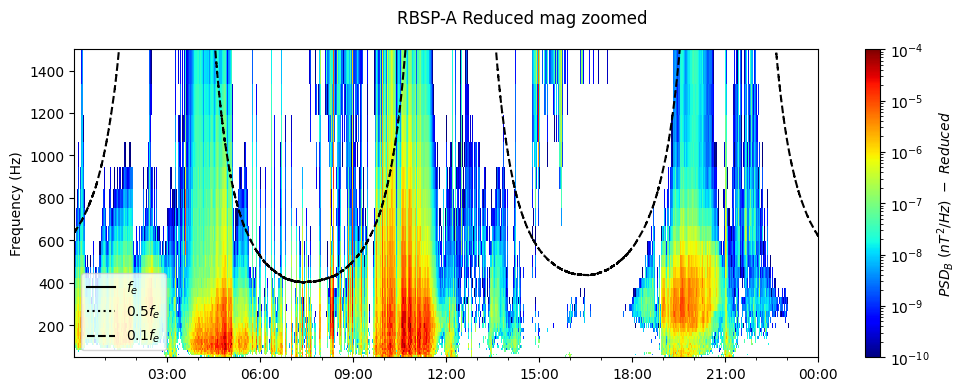

In [178]:
# Zooming in to find the chorus bands

cont = plt.pcolormesh(wna_file2['Epoch'], wna_file2['WFR_frequencies'][0], np.transpose(Btotal_reduced), 
    norm=colorbar_log, 
    cmap="jet")
plt.ylabel('Frequency (Hz)')

plt.plot(epochT,gyroF, color='black', label = r'$f_e$')
plt.plot(epochT,half_gyroF, color = 'black', linestyle='dotted',label = r'$0.5f_e$')
plt.plot(epochT,tenth_gyroF,color = 'black', linestyle='dashed',label = r'$0.1f_e$')
plt.ylim(0.5*10**2,1.5*10.**3)
plt.legend()

plt.colorbar(
    cont,
    label=r'$PSD_B\ (nT^2/Hz)\ -\ Reduced$'
    )
plt.suptitle(f'RBSP-A Reduced mag zoomed ')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
hours = mdates.HourLocator(interval=1)
plt.gca().xaxis.set_minor_locator(hours)
plt.gcf().set_size_inches((12, 4))